In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1. Read the Data

In [ ]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# What are the features and what is a target variable ?
# Feature set - {TV, Radio, Newspaper}
# Target - Sales

In [ ]:
# Choosing one variable only for LR
# data = data[['TV','sales']]
# data.head()

### 2. Prepare the data

In [ ]:
data.shape

(200, 4)

In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


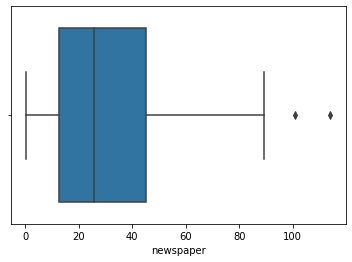

In [ ]:
#Outlier Detection
sns.boxplot(data['newspaper']);

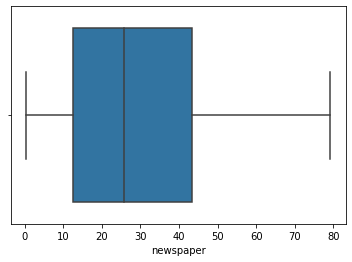

In [ ]:
filter = data['newspaper'] < 82
data = data[filter]
sns.boxplot(data['newspaper']);

In [ ]:
data.shape

(196, 4)

In [ ]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.070843,0.061320,0.782440
radio,0.070843,1.000000,0.362191,0.588494
newspaper,0.061320,0.362191,1.000000,0.251373
sales,0.782440,0.588494,0.251373,1.000000


### 3. Split the data

In [ ]:
features = data[['TV', 'radio', 'newspaper']]
# features = data.drop('sales', axis =1)
target = data['sales']

In [ ]:
# When I do a split, how many variables will I get in the output ?

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=.25,random_state = 100)

print('Train feature size :', X_train.shape)
print('Test feature size :', X_test.shape)
print('Train target size :', y_train.shape)
print('Test target size :', y_test.shape)

Train feature size : (147, 3)
Test feature size : (49, 3)
Train target size : (147,)
Test target size : (49,)


### 4. Train the model (Fit the model)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
my_lr_model = LinearRegression()

In [ ]:
# The gradient descent is running behind to find me the best value of coefficients
my_lr_model.fit(X_train, y_train)

LinearRegression()

#### Interpretation

In [ ]:
my_lr_model.coef_

array([[0.04487424, 0.18790784, 0.00355926]])

A unit increase in TV spend was associated with an increase of .046 unit increase in sales 
 OR
An additinal spend of $ 1000 on TV ads was associated with an increase in sales of 46.36 unit increase in sales 

In [ ]:
my_lr_model.intercept_

array([2.99549525])

In a new market here TV spend is $ 50,000  and $100,000? How will you predict the sales ?

In [ ]:
# my_lr_model.coef_* 50 + my_lr_model.intercept_

In [ ]:
# Run this for only TV
# my_lr_model.predict(pd.DataFrame({'TV':[50,100]}))
my_lr_model.predict(pd.DataFrame({'TV' : [50], 'radio': [100], 'newspaper' : [30]}))

array([[24.1367686]])

In [ ]:
# X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
# pred = my_lr_model.predict(X_new)
# data.plot(kind='scatter',x='TV',y='sales')
# plt.plot(X_new, pred, c='red');

### Evaluating Coefficients

In [ ]:
import statsmodels.formula.api as smf
my_stat_model = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()
my_stat_model.pvalues

Intercept    5.076788e-17
TV           2.959789e-79
radio        7.832814e-53
newspaper    5.872275e-01
dtype: float64

In [ ]:
my_stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     563.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.32e-95
Time:                        02:20:08   Log-Likelihood:                -377.33
No. Observations:                 196   AIC:                             762.7
Df Residuals:                     192   BIC:                             775.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9108      0.315      9.228      0.000       2.289       3.533
TV             0.0455      0.001     32.168      0.000       0.043       0.048
radio          0.1868      0.009     21.437      0.000       0.170       0.204
newspaper      0.0036      0.007      0.544      0.587      -0.009       0.016
==============================================================================
Omnibus:                       62.255   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.959
Skew:                          -1.372   Prob(JB):                     4.11e-36
Kurtosis:                       6.525   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Validate your model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# make predictions on test feature set

y_predictions = my_lr_model.predict(X_test)

In [ ]:
# Compare the above predicted values with the actual values

mean_squared_error(y_test, y_predictions)

3.9049446381604733

If the business has shared you the range of accepted mse i.e. between 10 - 20 then this is done.

If not, then go to step 2

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
data.DESCR.split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
my_model_Ridge = Ridge()
my_model_Lasso = Lasso()
my_model_ElasticNet = ElasticNet()

In [ ]:
my_model_Ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = my_model_Ridge.predict(X_test)
mean_squared_error(y_pred_ridge,y_test)

3.904935501723127

In [ ]:
y_pred_ridge = my_model_Ridge.predict(X_test)
mean_squared_error(y_pred_ridge,y_test)

In [ ]:
y_pred_ridge = my_model_Ridge.predict(X_test)
mean_squared_error(y_pred_ridge,y_test)